In [1]:
import sqlite3 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
con = sqlite3.connect("baseline_v4.3.3_10yrs.db")
data = pd.read_sql("select * from observations ;", con)
con.close()

In [3]:
data["rotTelPos"]

0          43.955804
1          43.904267
2          43.923271
3          43.952681
4          43.969717
             ...    
2015191   -27.849664
2015192   -27.204084
2015193   -24.417544
2015194   -22.859352
2015195   -21.225193
Name: rotTelPos, Length: 2015196, dtype: float64

In [4]:
indx = np.where(data["night"] == 2202)[0]

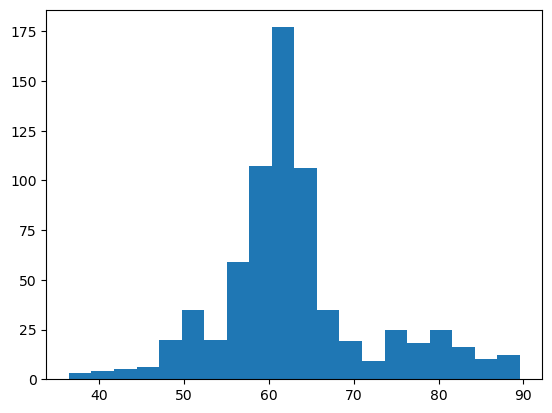

In [5]:
_tmp = plt.hist(data["rotTelPos"].iloc[indx], bins=20)

In [6]:
drot = np.diff(data["rotTelPos"].iloc[indx])

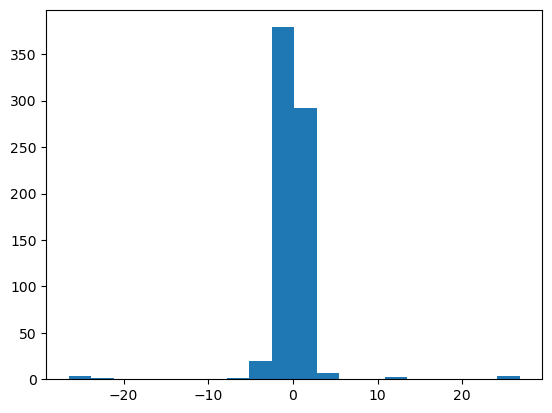

In [7]:
_tmp = plt.hist(drot, bins=20)

In [8]:
indx.shape

(711,)

In [9]:
np.sum(data["rotTelPos"].iloc[indx] == data["rotTelPos_backup"].iloc[indx])

np.int64(0)

Text(0, 0.5, 'RotTelPos (degrees)')

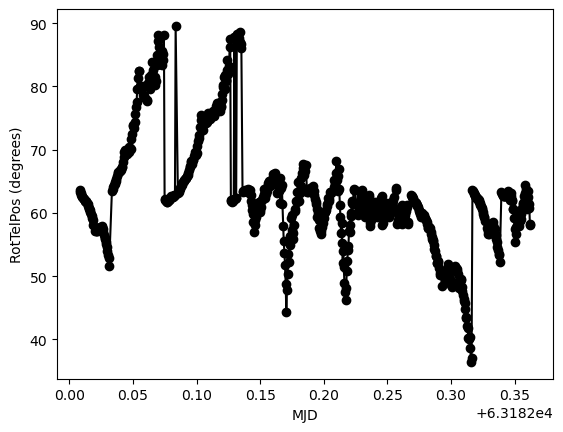

In [14]:
plt.plot(data["observationStartMJD"].iloc[indx], data["rotTelPos"].iloc[indx], '-ko')
plt.xlabel("MJD")
plt.ylabel("RotTelPos (degrees)")

In [11]:
def abs_sum_diff(inarr):
    return np.sum(np.abs(np.diff(inarr)))

In [12]:
ack = data.groupby("night")["rotTelPos"].apply(abs_sum_diff)

In [13]:
ack.mean(), np.median(ack)

(np.float64(649.9456570228538), np.float64(644.4156354612217))